In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("census.csv")
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

<Axes: xlabel='income', ylabel='count'>

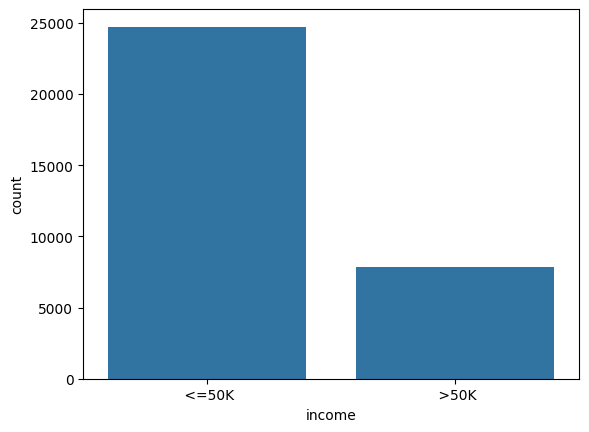

In [5]:
sns.countplot(x = df['income'])

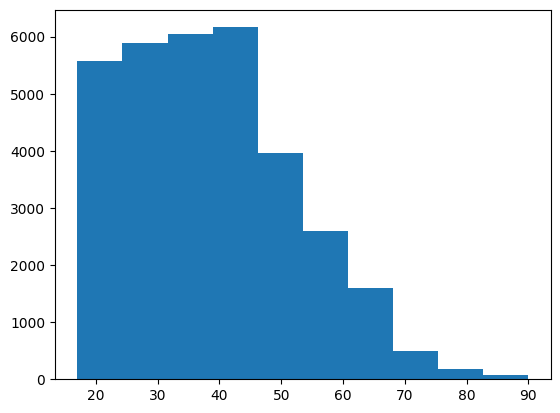

In [6]:
plt.hist(x =df['age'])
plt.show()

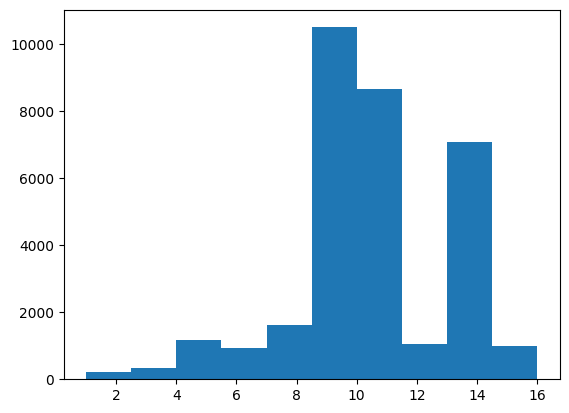

In [7]:
plt.hist(x = df['education-num'])
plt.show()

In [8]:
graf = px.treemap(df, path = ['workclass', 'age', 'education-num'])
graf.show()

In [9]:
graf2 = px.treemap(df, path = ['occupation', 'native-country', 'income'])
graf2.show()

In [10]:
graf3 = px.parallel_categories(df, dimensions = ['income', 'education', 'occupation'])
graf3.show()

Separando previsores e classes

In [11]:
x_census = df.iloc[:, 0:14].values
x_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [12]:
y_census = df.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder_test = LabelEncoder()
teste = label_encoder_test.fit_transform(x_census [:, 1])
teste

array([7, 6, 4, ..., 4, 4, 5])

In [15]:
le = LabelEncoder()

In [16]:
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

Etiquetando variáveis que são string, para que seja possível ser utilizado pelo algoritmo de ML

In [17]:
x_census[:, 1] = le.fit_transform(x_census[:, 1])
x_census[:, 3] = le.fit_transform(x_census[:, 3])
x_census[:, 5] = le.fit_transform(x_census[:, 5])
x_census[:, 6] = le.fit_transform(x_census[:, 6])
x_census[:, 7] = le.fit_transform(x_census[:, 7])
x_census[:, 8] = le.fit_transform(x_census[:, 8])
x_census[:, 9] = le.fit_transform(x_census[:, 9])
x_census[:, 13] = le.fit_transform(x_census[:, 13])

In [18]:
x_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Númerando as variáveis para que não exista distinção de valor mais importante e valor menos importante no algoritmo de ML

In [20]:
onehotencoder_census = ColumnTransformer(transformers =[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [21]:
x_census = onehotencoder_census.fit_transform(x_census).toarray()

In [22]:
x_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [23]:
x_census.shape

(32561, 108)

Separação dos valores que serão utilizados para teste e treinamento


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_census_treinamento, x_census_test, y_census_treinamento, y_census_teste = train_test_split(x_census, y_census, test_size = 0.15, random_state = 0)

In [26]:
x_census_treinamento.shape, y_census_treinamento.shape


((27676, 108), (27676,))

Salvamento das variáveis

In [27]:
import pickle
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([x_census_treinamento, y_census_treinamento, x_census_test, y_census_teste], f)

In [28]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_test, y_census_teste = pickle.load(f)

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
forest_census = RandomForestClassifier(n_estimators= 200, criterion= "entropy")
forest_census.fit(x_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [53]:
previsoes = forest_census.predict(x_census_test)

In [35]:
from sklearn.metrics import accuracy_score, classification_report

In [54]:
accuracy_score(y_census_teste, previsoes)

0.8491299897645854

0.8491299897645854

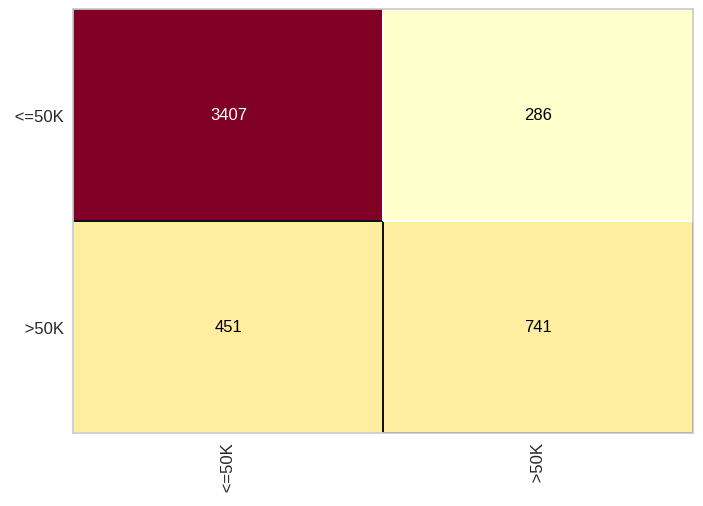

In [55]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(forest_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_test, y_census_teste)

In [56]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      3693
        >50K       0.72      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.79      4885
weighted avg       0.84      0.85      0.85      4885

